<a href="https://colab.research.google.com/github/wkzhiro/comment_count/blob/main/comment_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# フリーコメントの集計自動化

## ・免責事項
> これは㈱Tech0によって提供されるプログラム体験ファイルであり、その目的に特化して作成されています。当社では、このファイルを使用した際に発生する可能性のあるいかなる不具合についても責任を負いかねます。<br>ファイルの品質と機能性を確保するために万全を尽くしておりますが、万一の不具合発生時にはご理解いただけますようお願い申し上げます。

## ・操作方法

下記に用意されているコードに対して、<br>
> windows: コードブロックを選択した状態でCtrl + Enter<br>
>Mac: コードブロックを選択した状態でCommand + Enter

もしくは▶マークを選択して、コードを起動してください。

## ・確認

コードブロック横が✔になれば動作は完了しています。<br>
Warningが表示されていたとしても、先に続くコードが活用できていれば基本問題はございません。

## ・ダウンロードについて

プログラム実行時にファイルがダウンロードされますが、ご使用の端末やクラウド上にはデータは保存されません。

###初めに
今回はアンケート調査の中でも労力のかかるフリーコメントの集計を行います。<br>
具体的な手順は以下の通りです。<br>
①フリーコメントからラベルをChatGPTで作成<br>
②各フリーコメントにラベルをChatGPTで付与

###①フリーコメントからラベルをChatGPTで作成

In [1]:
#必要なライブラリのインストール
!pip install --upgrade openai
!pip install tiktoken==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:00


**以下のセルを実行する前にデータをアップロードしてください。**<br>
①左端のフォルダマークをクリック<br>
※サンプルとして、Githubにサンプルファイルを入れてあります。<br>
②ファイルをドラッグアンドドロップして、アップロード<br>
③アップロード後、ファイルにカーソルを当てると表示される「・・・」にカーソルを当てて、「パスをコピー」を選択

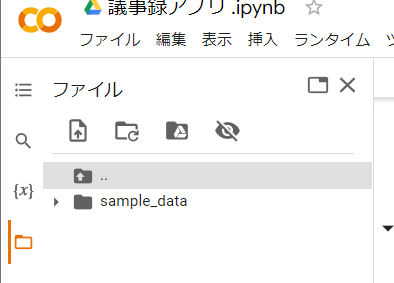

In [3]:
#アンケートの読込
import pandas as pd

#手持ちのデータでされる際は、パスをコピーして書き換えてください。（コピー方法は上記記載）
df = pd.read_csv('/content/Programming_School_Survey.csv')

# Print the DataFrame
print(df)

     ID                            Comment
0     1                アクセスが便利で、教室がきれいでした。
1     2   実践的なプロジェクトが多く、現場のスキルが身についたと感じます。
2     3                  より多くの外部講師を招いて欲しい。
3     4            同期との交流が多く、とても刺激的な環境でした。
4     5           スケジュールが柔軟で、仕事との両立が可能でした。
..  ...                                ...
95   96            同期との交流が多く、とても刺激的な環境でした。
96   97       プログラムの内容がとても充実していて学びが多かったです。
97   98  費用に見合った価値はあったと思いますが、もう少し安いと助かります。
98   99       プログラムの内容がとても充実していて学びが多かったです。
99  100           もう少し小さいクラスだと理解が深まると思います。

[100 rows x 2 columns]


**＜重要＞自前のデータを使用する際は、「Comment」という列になるようにカラム名を変更してください。**

In [55]:
#データの読み込み
import pandas as pd
df = pd.read_csv('/content/Programming_School_Survey.csv')

# Print the DataFrame
df.head()

,ID,Comment
0,1,アクセスが便利で、教室がきれいでした。
1,2,実践的なプロジェクトが多く、現場のスキルが身についたと感じます。
2,3,より多くの外部講師を招いて欲しい。
3,4,同期との交流が多く、とても刺激的な環境でした。
4,5,スケジュールが柔軟で、仕事との両立が可能でした。


In [56]:
#フリーアンサーからラベルの生成
answer = ""

for index, row in df.iterrows():
  answer += "、" + row["Comment"]  #Commentは列名です。

In [57]:
#トークン数の確認
#16,000トークン以上の場合は、トークン数の制限により実行できません。
import tiktoken
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
tokens = encoding.encode(answer)
tokens_count = len(tokens)
print(str(tokens_count)+"トークン")

token_limit = 1000  # トークンの限界値

# トークン数が限界を超える場合の分割処理
texts = []  # 分割されたテキストを格納するリスト
current_text = ""  # 現在のテキストセグメント
current_tokens = []  # 現在のトークンリスト

for token in tokens:
    # 新しいトークンを追加
    current_tokens.append(token)
    if len(current_tokens) >= token_limit:
        # 現在のトークンリストからテキストを復元
        current_text = encoding.decode(current_tokens)
        texts.append(current_text)  # リストに追加
        current_tokens = []  # トークンリストをリセット

# 最後のセグメントを追加
if current_tokens:
    current_text = encoding.decode(current_tokens)
    texts.append(current_text)

# 結果の確認
for i, text in enumerate(texts):
    print(f"Segment {i+1}: {len(encoding.encode(text))} tokens")

2667トークン
Segment 1: 1000 tokens
Segment 2: 1000 tokens
Segment 3: 667 tokens


（参考）次のAPIキーの取得方法は、下記のリンクを参考にしてください。

  https://zenn.dev/smartcamp/articles/8b24739ab8cba3

In [ ]:
from openai import OpenAI
import os

label = {}

#ここで取得したAPIキーを入力してください。
client = OpenAI(
    api_key = "ここにAPIキーを記載"
)

#是非、自分の考えたプロンプトを入力してみてさい。
def create_label(text, label):
    prompt = f"""
    あなたはマーケティングに関する優秀なリサーチャーです。
    以下のアンケートのフリーアンサーの一覧から、ラベルとその説明を提案してください。

    ###記事内容
    {text}

    ###出力フォーマット
    {{"ラベル名":"その説明"}}

    ###条件
    ・既存のラベルと重なった場合は無視してください。
    ・上記記載のjson形式で返すようにしてください。
    ・既存のラベルに追加して、出力してください。
    ・説明は30文字以内で書いてください。

    ###既存のラベル
    {label}
    """

    response = client.chat.completions.create(
      model="gpt-4-turbo",
      messages=[
        {
          "role": "user",
          "content": prompt
        }
      ],
      response_format={"type": "json_object"}

    )

    return response.choices[0].message.content

for text in texts:
    label = create_label(text, label)

print(label)

###②各フリーコメントにラベルをChatGPTで付与

In [43]:
# 新しい列「Label」を追加
df['Label'] = ""

# 各コメントに対してラベルを割り当てる
for index, row in df.iterrows():
    label_prompt = f"""
        コメントに最も適したラベルを提案してください。
        次に記載するラベルから選択してください。

        ###コメント
        {row['Comment']}

        ###条件
        ・必要あれば、複数のラベルを使用してください。
        ・カンマ（,）区切りでjsonで出力してください。例：アクセスと環境、クラスサイズ

        ###ラベル候補
        {label}

        ###出力形式
        ラベル名１、ラベル名２

        """
    try:
        # ChatGPT APIを呼び出し
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {
                  "role": "user",
                  "content": label_prompt
                }
             ],
            max_tokens=30
        )
        # ラベルをデータフレームに設定
        df.at[index, 'Label'] = response.choices[0].message.content.strip()
        print(index, "フリーアンサー：",row['Comment'],"ラベル：",response.choices[0].message.content.strip())
    except Exception as e:
        print(f"API呼び出しでエラーが発生しました: {e}")

# 結果を表示
print(df)

0 フリーアンサー： アクセスが便利で、教室がきれいでした。 ラベル： アクセスと環境, 学習環境の快適性
1 フリーアンサー： 実践的なプロジェクトが多く、現場のスキルが身についたと感じます。 ラベル： 実践的プロジェクト
2 フリーアンサー： より多くの外部講師を招いて欲しい。 ラベル： 外部講師の招待
3 フリーアンサー： 同期との交流が多く、とても刺激的な環境でした。 ラベル： 交流と刺激
4 フリーアンサー： スケジュールが柔軟で、仕事との両立が可能でした。 ラベル： スケジュールの柔軟性
5 フリーアンサー： 実践的なプロジェクトが多く、現場のスキルが身についたと感じます。 ラベル： 実践的プロジェクト
6 フリーアンサー： 資料が豊富で役に立ちました。 ラベル： 教材の豊富さ, 役に立つ
7 フリーアンサー： より多くの外部講師を招いて欲しい。 ラベル： 外部講師の招待
8 フリーアンサー： 友人にもおすすめしたいと思います。 ラベル： おすすめの意志
9 フリーアンサー： 講師の質が高く、わかりやすい説明で非常に満足しています。 ラベル： 講師の質, カスタマーサポート
10 フリーアンサー： もう少し小さいクラスだと理解が深まると思います。 ラベル： クラスサイズ
11 フリーアンサー： テクノロジーへの理解が深まり、キャリアに生かせそうです。 ラベル： テクノロジーの理解
12 フリーアンサー： コース後のサポートがもっと充実していればよかった。 ラベル： コース後のサポート, カスタマーサポート
13 フリーアンサー： オンライン授業が多く、直接質問がしにくいことがありました。 ラベル： オンライン授業の課題
14 フリーアンサー： オンライン授業が多く、直接質問がしにくいことがありました。 ラベル： オンライン授業の課題
15 フリーアンサー： 資料が豊富で役に立ちました。 ラベル： 教材の豊富さ
16 フリーアンサー： 講師の質が高く、わかりやすい説明で非常に満足しています。 ラベル： 講師の質
17 フリーアンサー： 友人にもおすすめしたいと思います。 ラベル： おすすめの意志
18 フリーアンサー： アクセスが便利で、教室がきれいでした。 ラベル： アクセスと環境, 学習環境の快適性
19 フリーアンサー： もう少し小さいクラスだと理解

In [ ]:
#ラベルのカウントします。

# Label列のデータをカンマで分割し、個々のラベルをカウント
label_counts = df['Label'].str.split(',|、').explode().value_counts()

# 結果をDataFrameに変換して、見やすく表示
label_counts_df = pd.DataFrame(label_counts)
label_counts_df

以上、如何だったでしょうか？
ChatGPTを使用することで、数時間かかる作業が数分で処理できました！
